# Need to clone my (dtamayo) REBOUND fork specifically, i.e., 

git clone https://github.com/dtamayo/rebound.git

- For resonant systems use commit 6fb912f615ca542b670ab591375191d1ed914672
- For random systems use commit 4a6c79ae14ffde27828dd9d1f8d8afeba94ef048


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import rebound
rebound.__version__

/mnt/ssd/home/dtamayo/workspace/rebound/rebound/simulation.py:766: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if func is "merge":
/mnt/ssd/home/dtamayo/workspace/rebound/rebound/simulation.py:769: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  elif func is "hardsphere":
/mnt/ssd/home/dtamayo/workspace/rebound/rebound/units.py:96: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if len(newunits) is not 3:
/mnt/ssd/home/dtamayo/workspace/rebound/rebound/horizons.py:65: SyntaxWarning: invalid escape sequence '\['
  ( b'Accept default output \[.*:', 'n\n' ),
/mnt/ssd/home/dtamayo/workspace/rebound/rebound/horizons.py:66: SyntaxWarning: invalid escape sequence '\['
  ( b'Output reference frame \[.*:', 'J2000\n' ),
/mnt/ssd/home/dtamayo/workspace/rebound/rebound/horizons.py:67: SyntaxWarning: invalid escape sequence '\['
  ( b'Corrections \[.*:', 'NONE\n' ),
/mnt/ssd/home/dtamayo/workspace/rebound/rebound/horizons.py:68: SyntaxWarning: invalid 

'3.8.3'

# Need to edit datafolder below to your own path

In [2]:
datafolder = '/home/dtamayo/workspace/data/'

def collision(reb_sim, col):
    reb_sim.contents._status = 5
    return 0

# Random

# Rerunning from last (or any) snapshot

In [16]:
%%time
sa = rebound.SimulationArchive(datafolder+'random/simulation_archives/runs/sa0000000.bin')
tmax = sa[2].t
sim = sa[1]
sim.integrator_synchronize()
sim.collision_resolve = collision
sim.ri_whfast.keep_unsynchronized = 1
sim.integrate(tmax, exact_finish_time=0)
sim.status()

---------------------------------
REBOUND version:     	3.4.0
REBOUND built on:    	Jul  2 2024 17:14:49
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	2.0000000211196817e+06
Current timestep:    	0.034640
---------------------------------
<rebound.Particle object, m=1.0 x=-1.851704253568108e-05 y=4.430555544564171e-07 z=4.2929987064980875e-07 vx=5.427997318285949e-05 vy=-0.00011981920270492485 vz=2.7270879679879146e-06>
<rebound.Particle object, m=3.4140160192072926e-05 x=0.6505455610721905 y=0.7578296626173221 z=-0.0062144536095948485 vx=-4.85054625151075 vy=4.004600308357132 vz=-0.01905023906872239>
<rebound.Particle object, m=1.8787249753397036e-05 x=-0.20160115464374048 y=-1.2398495425382028 z=-0.003817288821332816 vx=5.442378664350001 vy=-0.8010019353432719 vz=-0.08583021200508456>
<rebound.Particle object, m=1.8268998599127623e-06 x=0.05191533676543384 y=-1.6542333171913126 z=-0.07959991329341315 vx=4.965310820871533 vy=-1.0125732427677636 vz=-0.25408

In [17]:
sim = sa[2]
sim.integrator_synchronize() # need this step with new sim archive because we used safe_mode = 0
sim.status()

---------------------------------
REBOUND version:     	3.4.0
REBOUND built on:    	Jul  2 2024 17:14:49
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	2.0000000211196817e+06
Current timestep:    	0.034640
---------------------------------
<rebound.Particle object, m=1.0 x=-1.851704253568108e-05 y=4.430555544564171e-07 z=4.2929987064980875e-07 vx=5.427997318285949e-05 vy=-0.00011981920270492485 vz=2.7270879679879146e-06>
<rebound.Particle object, m=3.4140160192072926e-05 x=0.6505455610721905 y=0.7578296626173221 z=-0.0062144536095948485 vx=-4.85054625151075 vy=4.004600308357132 vz=-0.01905023906872239>
<rebound.Particle object, m=1.8787249753397036e-05 x=-0.20160115464374048 y=-1.2398495425382028 z=-0.003817288821332816 vx=5.442378664350001 vy=-0.8010019353432719 vz=-0.08583021200508456>
<rebound.Particle object, m=1.8268998599127623e-06 x=0.05191533676543384 y=-1.6542333171913126 z=-0.07959991329341315 vx=4.965310820871533 vy=-1.0125732427677636 vz=-0.25408

# We could therefore reload the last snapshot of a stable sim and keep running like this

In [15]:
%%time
sa = rebound.SimulationArchive(datafolder+'random/simulation_archives/runs/sa0000003.bin')
sim = sa[-1]
sim.integrator_synchronize()
sim.collision_resolve = collision
sim.ri_whfast.keep_unsynchronized = 1

CPU times: user 368 μs, sys: 4 ms, total: 4.37 ms
Wall time: 17.3 ms


/mnt/ssd/home/dtamayo/workspace/rebound/rebound/simulationarchive.py:83: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/home/dtamayo/workspace/rebound/rebound/simulationarchive.py:123: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/home/dtamayo/workspace/rebound/rebound/simulationarchive.py:123: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/home/dtamayo/workspace/rebound/rebound/simulationarchive.py:123: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


# Check the simulation time is at 1e9

In [23]:
sim.t

CPU times: user 3.59 ms, sys: 0 ns, total: 3.59 ms
Wall time: 16.2 ms


1000000000.0

# Run for some time larger than 1e9

Note the time should the time you want to run TO (not the deltaT), so choose something larger than 1e9. I chose something that would run quickly. We need to check for collisions like this (or if sim.t is not the time we put in)

In [ ]:
sim.integrate(1.0001e9, exact_finish_time=0)
if sim._status == 5:
    print('collision')

# Checking the last snapshot for ejection

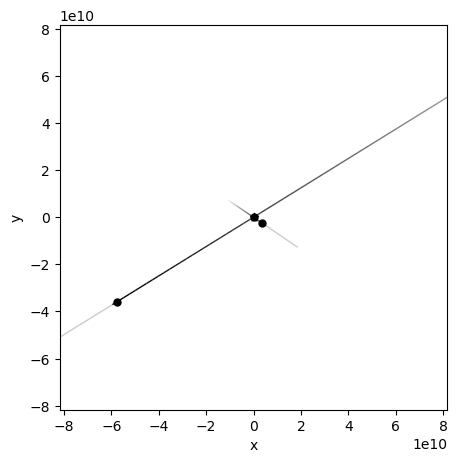

In [4]:
sa = rebound.SimulationArchive(datafolder+'random/simulation_archives/runs/sa0001311.bin')
sim = sa[-1]
fig = rebound.OrbitPlot(sim)

In [31]:
def test_ejection(row):
    sa = rebound.SimulationArchive(datafolder+'random/simulation_archives/runs/sa'+row['runstring'])
    sim = sa[-1]

    ejection = False
    for p in sim.particles[1:]:
        if p.a < 0:
            ejection = True
    return ejection

In [42]:
%%time
df = pd.read_csv(datafolder+'random/random.csv', index_col=0)
df['ejection'] = df.apply(test_ejection, axis=1)
df.to_csv('randomejections.csv', encoding='ascii')
print('Num ejections = ', df['ejection'].sum())

Num ejections =  59
CPU times: user 2.21 s, sys: 636 ms, total: 2.84 s
Wall time: 2.85 s


In [43]:
df = pd.read_csv('randomejections.csv', index_col=0)
ejections = df[df['ejection']==True]
ejections

,runstring,ejection
770,0000770.bin,True
855,0000855.bin,True
1311,0001311.bin,True
2033,0002033.bin,True
2208,0002208.bin,True
2279,0002279.bin,True
2356,0002356.bin,True
2471,0002471.bin,True
3552,0003552.bin,True
3567,0003567.bin,True


# Resonant

For the resonant ones we can check for collisions with a more intuitive try except block. 

In [13]:
%%time
sa = rebound.SimulationArchive(datafolder+'resonant/simulation_archives/runs/sa0000000.bin')
tmax = sa[2].t
sim = sa[1]
sim.integrator_synchronize()
try:
    sim.integrate(1e9, exact_finish_time=0)
except:
    print('collision at t=', sim.t)

collision at t= 1572166.7220307563
CPU times: user 17.4 s, sys: 0 ns, total: 17.4 s
Wall time: 17.4 s


In [14]:
sim = sa[2]
sim.integrator_synchronize() # need this step with new sim archive because we used safe_mode = 0
sim.status()

---------------------------------
REBOUND version:     	3.6.1
REBOUND built on:    	Jul  2 2024 22:37:48
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.5458722854223710e+06
Current timestep:    	0.034641
---------------------------------
<rebound.Particle object, m=0.9999960150799597 x=-1.3452787937215021e-05 y=-1.229323882801286e-05 z=4.4182823315334517e-08 vx=3.637618966206748e-05 vy=-5.255295181258874e-05 vz=4.0678496749271823e-07>
<rebound.Particle object, m=3.984920040268468e-06 x=0.6447261874012978 y=-0.7661304346468621 z=0.002066834173006789 vx=4.741921015648995 vy=4.109696403024398 vz=-0.009251417886986734>
<rebound.Particle object, m=1.2444171101394952e-05 x=0.8567439366026361 y=1.208187359189252 z=-0.004097965474559257 vx=-4.352941091406819 vy=2.84713665158252 vz=-0.035167141084396954>
<rebound.Particle object, m=2.531702420746453e-07 x=0.877211625484106 y=1.2294815758899236 z=-0.005620852759062533 vx=-4.358636487796651 vy=2.9453508832261703 vz=0

I can't get snapshots to line up with each other exactly, but not a big deal for loading the last snapshot and keeping on going:

In [20]:
%%time
sa = rebound.SimulationArchive(datafolder+'resonant/simulation_archives/runs/sa0000001.bin')
sim = sa[-1]
sim.integrator_synchronize()
sim.t

CPU times: user 0 ns, sys: 11.2 ms, total: 11.2 ms
Wall time: 8.68 ms


999000000.0049602

In [21]:
%%time
try:
    sim.integrate(1.0001e9, exact_finish_time=0)
except:
    print('collision at t=', sim.t)

CPU times: user 33.4 s, sys: 12 ms, total: 33.4 s
Wall time: 33.4 s


# Get ejections

In [3]:
def test_ejection(row):
    try:
        sa = rebound.SimulationArchive(datafolder+'resonant/simulation_archives/runs/sa'+row['runstring'])
    except:
        return False
    sim = sa[-1]

    ejection = False
    for p in sim.particles[1:]:
        if p.a < 0:
            ejection = True
    return ejection

In [4]:
%%time
df = pd.read_csv(datafolder+'resonant/labels.csv', index_col=0)
df['ejection'] = df.apply(test_ejection, axis=1)
df.to_csv('resonantejections.csv', encoding='ascii')
print('Num ejections = ', df['ejection'].sum())

/mnt/ssd/home/dtamayo/workspace/rebound/rebound/simulationarchive.py:89: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/home/dtamayo/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/home/dtamayo/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


Num ejections =  65
CPU times: user 38.8 s, sys: 23.9 s, total: 1min 2s
Wall time: 1min 9s
